Digite o nó que enviará a sonda em G: 
Matriz de Sondas =  [[1, 5, 3], [2, 6, 4], [7]]
  Topology         Where MPolka MPINT INT Clássico
0     Isis     DataPlane    170   129          340
1     Isis  ControlPlane     51    44          170
  Topology         Where MPolka MPINT INT Clássico
0     Isis     DataPlane    170   129          340
1     Isis  ControlPlane     51    44          170
2    Isis2     DataPlane    170   129          340
3    Isis2  ControlPlane     51    44          170
Digite o nó que enviará a sonda em G: 


TypeError: list indices must be integers or slices, not str

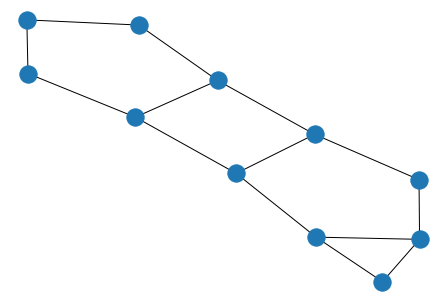

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

GIsis = nx.from_edgelist([[1,5],[5,3],[1,2],[2,6],[6,4],[6,7]])
sonda = []
sonda2 = []
sondaTemp = []

def EdgeListToMST(path):
    edgeList = readTopology(path)
    print(edgeList)
    G = nx.from_edgelist(edgeList)
    T = nx.minimum_spanning_tree(G,algorithm='prim')
    return T

def toDataframe(df,topology,sonda):
    #Overhead por abordagem
    overheadDP_mPolka = 0
    overheadDP_mPINT = 0
    overheadDP_INTClassico = 0
    overheadCP_mPolka = 0
    overheadCP_mPINT = 0
    overheadCP_INTClassico = 0

    for i in range(len(sonda)):
        overheadDP_mPolka += mPolkaDP_fixoPSonda + mPolkaDP_fixoPNo*len(sonda[i])
        overheadDP_mPINT += mPINTDP_fixoPSonda + mPINTDP_fixoPNo*len(sonda[i])
        overheadDP_INTClassico += INTClassicoDP_fixoPSonda + INTClassicoDP_fixoPNo*len(sonda[i])

        overheadCP_mPolka += mPolkaCP_fixoPSonda + mPolkaCP_fixoPNo*len(sonda[i])
        overheadCP_mPINT += mPINTCP_fixoPSonda + mPINTCP_fixoPNo*len(sonda[i])
        overheadCP_INTClassico += INTClassicoCP_fixoPSonda + INTClassicoCP_fixoPNo*len(sonda[i])

    #print('Overhead DataPlane MPolka = ',overheadDP_mPolka)
    #print('Overhead DataPlane MPINT = ',overheadDP_mPINT)
    #print('Overhead DataPlane INT Clássico = ',overheadDP_INTClassico)
    #print('Overhead ControlPlane MPolka = ',overheadCP_mPolka)
    #print('Overhead ControlPlane MPINT = ',overheadCP_mPINT)
    #print('Overhead ControlPlane INT Clássico = ',overheadCP_INTClassico)

    matrixOverhead = {}
    matrixOverhead['Topology'] = [topology,topology]
    matrixOverhead['Where'] = ['DataPlane','ControlPlane']
    matrixOverhead['MPolka'] = [overheadDP_mPolka,overheadCP_mPolka]
    matrixOverhead['MPINT'] = [overheadDP_mPINT,overheadCP_mPINT]
    matrixOverhead['INT Clássico'] = [overheadDP_INTClassico,overheadCP_INTClassico]
    df2 = pd.DataFrame(data=matrixOverhead)
    result = pd.concat([df,df2],ignore_index=True)
    return result

def readTopology(path):
    edgeList = []

    with open(path,'r') as arq:
        lines = arq.readlines()
    
    for i in range(len(lines)):
        line = lines[i].split(' ')
        line.pop()
        line = list(map(int,line))
        edgeList.append(line)
        #print(line)
    
    return edgeList

def dfs(G,v,visited): #Retorna a matriz de sondas do MPolka
  sondaTemp.append(v)
  visited[v] = True
  for w in G.neighbors(v):
    if len(list(G.neighbors(v))) == 1: #DEADEND
        #print(sondaTemp)
        sonda.append(sondaTemp.copy())
        sondaTemp.clear()
    if not visited[w]:
        dfs(G,w,visited)
  return sonda

print('Digite o nó que enviará a sonda em G: ')
node = int(input())


mPolkaDP_fixoPSonda = 10
mPolkaDP_fixoPNo = 20
mPolkaCP_fixoPSonda = 3
mPolkaCP_fixoPNo = 6

mPINTDP_fixoPSonda = 8
mPINTDP_fixoPNo = 15
mPINTCP_fixoPSonda = 3
mPINTCP_fixoPNo = 5

INTClassicoDP_fixoPSonda = 20
INTClassicoDP_fixoPNo = 40
INTClassicoCP_fixoPSonda = 10
INTClassicoCP_fixoPNo = 20

df = pd.DataFrame(columns=['Topology','Where','MPolka','MPINT','INT Clássico']) #Empty Row Dataframe

sondaIsis = dfs(GIsis,node,[False] * (GIsis.number_of_nodes() + 1))
print('Matriz de Sondas = ',sondaIsis)
df = toDataframe(df,'Isis',sondaIsis)
print(df)

df = toDataframe(df,'Isis2',sondaIsis)
print(df)

print('Digite o nó que enviará a sonda em G: ')
node = str(input())

#GAbilene = EdgeListToMST('topologydata/abilene/TOPOLOGY')
GAbilene = nx.read_gml('Abilene.gml',destringizer=int)
nx.draw(GAbilene)
sonda.clear()
sondaAbilene = dfs(GAbilene,node,[False] * (GAbilene.number_of_nodes() + 1))
print('Matriz de Sondas Abilene = ',sondaAbilene)
df = toDataframe(df,'Abilene',sondaAbilene)
print(df)

#sns.displot(df, x="MPolka",hue="Where",element="step");
sns.catplot(x="Topology", y="MPolka", hue="Where",kind="bar", data=df, errorbar = None);

In [75]:
GAbilene = nx.read_gml('Abilene.gml',destringizer=int)
#nx.draw(GAbilene)
#list(nx.edges(GAbilene).data())
#GAbilene.get_edge_data("New York","Chicago")
#GAbilene.node_dict_factory()

TypeError: 'dict' object is not callable

In [170]:
import networkx as nx


GAbilene = nx.read_gml('Abilene.gml')
nodes = GAbilene.nodes()
nodes = list(map(str,nodes))
nodesID = [iter for iter in range(len(nodes))]
edges = GAbilene.edges()
edges = list(map(list,edges))
edgesID = [[0,0] for iter in range(len(edges))]
print(nodes)
print(nodesID)
print(edges)

index = 0
for node in nodes:
    print(node)
    for edge in edges:
        print(edge)
        if(edge[0] == node):
            edgesID[index][0] = index
        elif(edge[1] == node):
            edgesID[index][1] = index
    index += 1

print(edgesID)

['New York', 'Chicago', 'Washington DC', 'Seattle', 'Sunnyvale', 'Los Angeles', 'Denver', 'Kansas City', 'Houston', 'Atlanta', 'Indianapolis']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[['New York', 'Chicago'], ['New York', 'Washington DC'], ['Chicago', 'Indianapolis'], ['Washington DC', 'Atlanta'], ['Seattle', 'Sunnyvale'], ['Seattle', 'Denver'], ['Sunnyvale', 'Los Angeles'], ['Sunnyvale', 'Denver'], ['Los Angeles', 'Houston'], ['Denver', 'Kansas City'], ['Kansas City', 'Houston'], ['Kansas City', 'Indianapolis'], ['Houston', 'Atlanta'], ['Atlanta', 'Indianapolis']]
New York
['New York', 'Chicago']
['New York', 'Washington DC']
['Chicago', 'Indianapolis']
['Washington DC', 'Atlanta']
['Seattle', 'Sunnyvale']
['Seattle', 'Denver']
['Sunnyvale', 'Los Angeles']
['Sunnyvale', 'Denver']
['Los Angeles', 'Houston']
['Denver', 'Kansas City']
['Kansas City', 'Houston']
['Kansas City', 'Indianapolis']
['Houston', 'Atlanta']
['Atlanta', 'Indianapolis']
Chicago
['New York', 'Chicago']
['New York', 'Wash